In [5]:
import numpy as np
from matplotlib import pyplot as plt
from numpy.random import normal, randint
from numpy.linalg import inv
%matplotlib inline

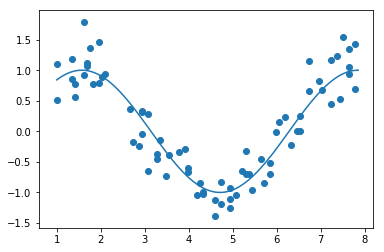

In [6]:
real_x = np.linspace(1, 2.5*np.pi, 100)
real_y = np.sin(real_x)
x = real_x[randint(0, real_x.shape[0]-1, 75)]
y = np.sin(x) + normal(0, 0.3, size=x.shape)
plt.plot(real_x, real_y)
plt.scatter(x, y)

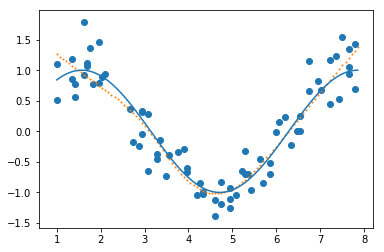

In [7]:
def do_expansion1(x, xi1, xi2):
    X = np.zeros(shape=(x.shape[0], 3))
    for i in range(X.shape[0]):
        X[i, 0] = int(x[i] < xi1)
        X[i, 1] = int(xi1 <= x[i] < xi2)
        X[i, 2] = int(x[i] >= xi1)    
    return X

def do_expansion2(x, xi1, xi2):
    X = np.zeros(shape=(x.shape[0], 4))
    for i in range(X.shape[0]):
        X[i, 0] = 1
        X[i, 1] = x[i]
        X[i, 2] = max(0, x[i] - xi1)
        X[i, 3] = max(0, x[i] - xi2)
    return X

def do_expansion3(x, xi1, xi2):
    X = np.zeros(shape=(x.shape[0], 6))
    for i in range(X.shape[0]):
        X[i, 0] = 1
        X[i, 1] = x[i]
        X[i, 2] = x[i] ** 2
        X[i, 3] = x[i] ** 3
        X[i, 4] = max(0, x[i] - xi1) ** 3
        X[i, 5] = max(0, x[i] - xi2) ** 3
    return X    

def dk(x, xi_k, xi_K):
    return (max(0, x-xi_k)**3 - max(0, x-xi_K)**3) / (xi_K-xi_k)

def do_nc_expansion(x, xi1, xi2, xi3, xi4, xi5):
    X = np.zeros(shape=(x.shape[0], 5))
    for i in range(X.shape[0]):
        X[i, 0] = 1
        X[i, 1] = x[i]
        X[i, 2] = dk(x[i], xi1, xi5) - dk(x[i], xi4, xi5)
        X[i, 3] = dk(x[i], xi2, xi5) - dk(x[i], xi4, xi5)
        X[i, 4] = dk(x[i], xi3, xi5) - dk(x[i], xi4, xi5)
    return X

xi1, xi2 = 3, 6
#X = do_expansion3(x, xi1, xi2)
X = do_nc_expansion(x, 2, 3, 4, 5, 6)
#X_real = do_expansion3(real_x, xi1, xi2)
X_real = do_nc_expansion(real_x, 2, 3, 4, 5, 6)
b = inv(X.T @ X) @ X.T @ y
y_real_hat = X_real @ b
plt.plot(real_x, real_y)
plt.scatter(x, y)
plt.scatter(real_x, y_real_hat, s=1)

In [8]:
from scipy.interpolate import CubicSpline